#### In This Notebook we have to extract the sentiments from the yelp reviews dataset.We have divided our work into three parts i.e Data Visualization and analysis ,Data Cleaning and Modelling

### Importing the modules and libraries required

##### Pandas for data mining
##### Numpy for mathematical calulations
##### Matplotlib ans seaborn for data visualizations
##### NLTK for Text Mining
##### SKlearn for Modelling

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from nltk.stem import SnowballStemmer
import string
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

##### Reading the dataset usign pandas 

In [2]:
df=pd.read_csv('/kaggle/input/yelp-reviews-dataset/yelp.csv')

In [3]:
df.head(5)

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


### Shape of dataset

In [4]:
df.shape

(10000, 10)

### Columns in the dataset

In [5]:
df.columns

Index(['business_id', 'date', 'review_id', 'stars', 'text', 'type', 'user_id',
       'cool', 'useful', 'funny'],
      dtype='object')

### Information about the data

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   business_id  10000 non-null  object
 1   date         10000 non-null  object
 2   review_id    10000 non-null  object
 3   stars        10000 non-null  int64 
 4   text         10000 non-null  object
 5   type         10000 non-null  object
 6   user_id      10000 non-null  object
 7   cool         10000 non-null  int64 
 8   useful       10000 non-null  int64 
 9   funny        10000 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 781.4+ KB


### Checking for Null Values

In [7]:
df.isnull().sum()

business_id    0
date           0
review_id      0
stars          0
text           0
type           0
user_id        0
cool           0
useful         0
funny          0
dtype: int64

#### Since for our task we only require columns  reviews and star ,So we have to delete all the other unnecessary columns

In [8]:
df=df.drop(['business_id','date','review_id','type','user_id','cool','useful','funny'],axis=1)

##### Here is our desired dataset in which text will act as a feature variable and starts will act as a  taeget varibale which we have to predict

In [9]:
df.head(5)

,stars,text
0,5,My wife took me here on my birthday for breakf...
1,5,I have no idea why some people give bad review...
2,4,love the gyro plate. Rice is so good and I als...
3,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!..."
4,5,General Manager Scott Petello is a good egg!!!...


# Section 1-Data Analysis and Visualizations

## Now to understand the data more deeply we have to some analysis and visualizations

##### Here we calulated the lenth of each review and stored in a list

In [10]:
#lets make some text analysis and calculate the the length of each review
list_review=[]
for i in df['text']:
    list_review.append(len(i))

###### Creating a new columns text_length for reviews

In [11]:
df['text_length']=list_review

In [12]:
df.head(5)

,stars,text,text_length
0,5,My wife took me here on my birthday for breakf...,889
1,5,I have no idea why some people give bad review...,1345
2,4,love the gyro plate. Rice is so good and I als...,76
3,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",419
4,5,General Manager Scott Petello is a good egg!!!...,469


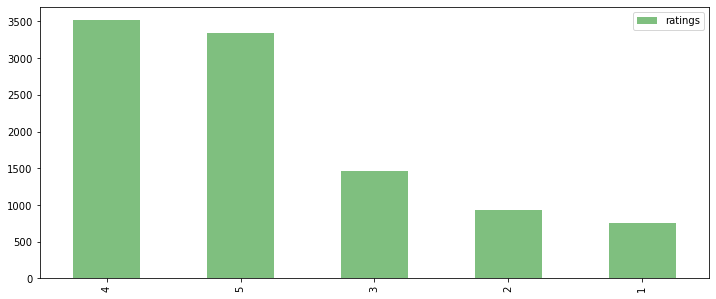

In [13]:
plt.figure(figsize=(12,5))
df['stars'].value_counts().plot(kind='bar',alpha=0.5,color='green',label='ratings')
plt.legend()
plt.show()

#### In this section of code we have checked the length of reviews which are of rating star 1 .We plotted a histogram for that

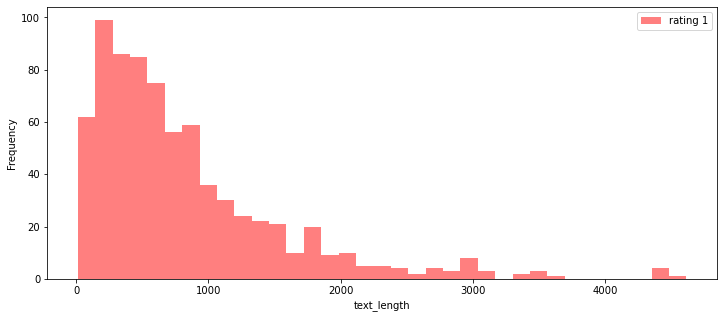

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12,5))
df[df['stars']==1]['text_length'].plot(bins=35,alpha=0.5,kind='hist',color='red',label='rating 1')
plt.legend()
plt.xlabel('text_length')
plt.show()

##### From this figure we can observe that mostly of 1 star reviews are length bw 0-2000

##### Similarly we will check for all the ratings 

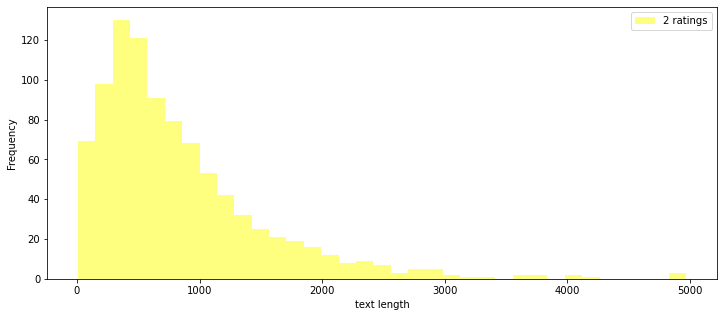

In [15]:
plt.figure(figsize=(12,5))
df[df['stars']==2]['text_length'].plot(bins=35,kind='hist',color='yellow',alpha=0.5,label='2 ratings')
plt.xlabel('text length')
plt.legend()
plt.show()

##### From the above figure we can observe that there is almost  similar senario with 2 star ratings

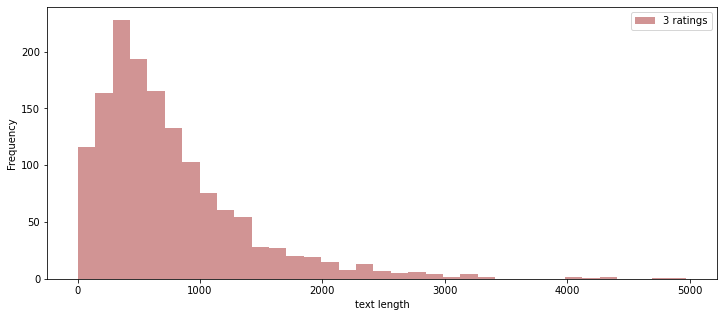

In [16]:
plt.figure(figsize=(12,5))
df[df['stars']==3]['text_length'].plot(bins=35,kind='hist',color='brown',alpha=0.5,label='3 ratings')
plt.xlabel('text length')
plt.legend()
plt.show()

##### In this case the frequency of reviews increases bw length 0-1000 i.e More than 200 

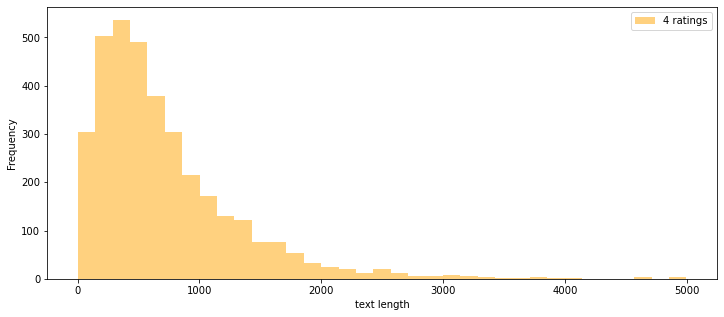

In [17]:
plt.figure(figsize=(12,5))
df[df['stars']==4]['text_length'].plot(bins=35,kind='hist',color='orange',alpha=0.5,label='4 ratings')
plt.xlabel('text length')
plt.legend()
plt.show()

##### If we look carefully we can observe that as the rating increases the length of the reviews decreases.From above plot we can see that there are very few reviews whose text length is greater than 3000

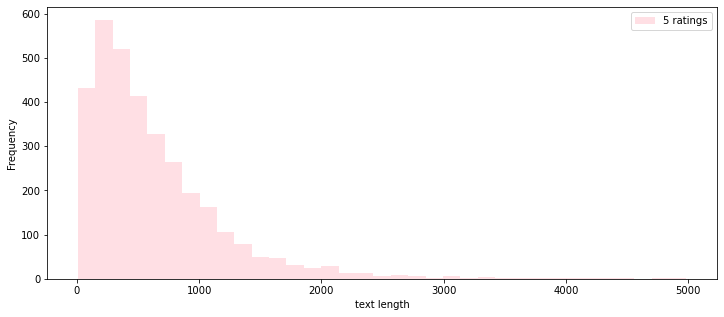

In [18]:
plt.figure(figsize=(12,5))
df[df['stars']==5]['text_length'].plot(bins=35,kind='hist',color='pink',alpha=0.5,label='5 ratings')
plt.xlabel('text length')
plt.legend()
plt.show()

##### Clearly we can observe that pattern here too on the 5 star ratings

## Conclusion  

##### From the above analysis we can conclude that reviews with rating 1-3 shows almost a similar trend as compare to of ratings 4-5.The reviews with in rating 1-3 are  may be the criticism , suggestion or could be detailed complaints, thats why some reviews also have a length of 3000-5000 words.Where as reviews having 4-5 ratings could be the appreciation,good talks or something positive

# Section 2 :Data Cleaning and Preprocessing

### From the above analysis we are summing up it into two class classification problem ,where reviews with rating 1-3 are classified as 0 and reviews with in range 4-5 are classfied as 1

##### Here we are using numpy's where clause to convert reviews into two-class i.e 0 and 1

In [19]:
df['stars']=np.where(df['stars']>3,1,0)

##### Here is the changed senario

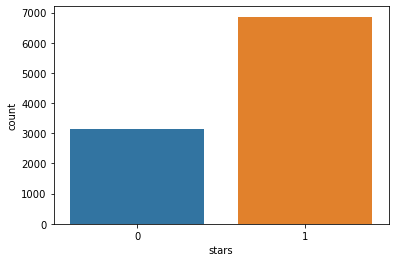

In [20]:
sns.countplot(df['stars'])

### In this section we have created two list for extracting the positive(1-class) and negative reviews(0-class) 

In [21]:
positive=[]
negative=[]
positive_reviews=df[df['stars']==1]['text']
negative_reviews=df[df['stars']==0]['text']

#### The extract_postive function will do following things:
#### 1-It will tokenize the text from positive reviews
#### 2-Remove the stopwords
#### 3-Convert into lowercase

In [22]:
def extract_positive(positive_reviews):
    global positive
    words = [word.lower() for word in word_tokenize(positive_reviews) if word.lower() not in stopwords.words("english") and word.lower().isalpha()]
    positive=positive+words

#### Similar functionality but for negative reviews

In [23]:
def extract_negative(negative_reviews):
    global negative
    words = [word.lower() for word in word_tokenize(negative_reviews) if word.lower() not in stopwords.words("english") and word.lower().isalpha()]
    negative=negative+words

### Applying the above two functions on positive and negative reviews

In [24]:
positive_reviews.apply(extract_positive)
negative_reviews.apply(extract_negative)

15      None
16      None
18      None
20      None
23      None
        ... 
9983    None
9984    None
9987    None
9995    None
9998    None
Name: text, Length: 3137, dtype: object

### WordCloud are used to highlight the most important and frequent words that appear in our dataset

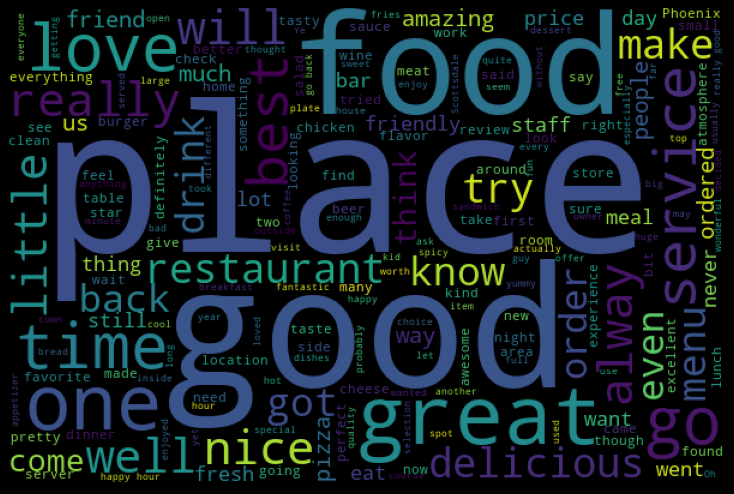

In [25]:
from wordcloud import WordCloud
pos_review_cloud=WordCloud(width=600,height=400).generate(" ".join(positive_reviews))
plt.figure(figsize=(10,8),facecolor='k')
plt.imshow(pos_review_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

#### As we can clearly observe that there are postive words like good,great,amazing etc

#### For Negative Reviews

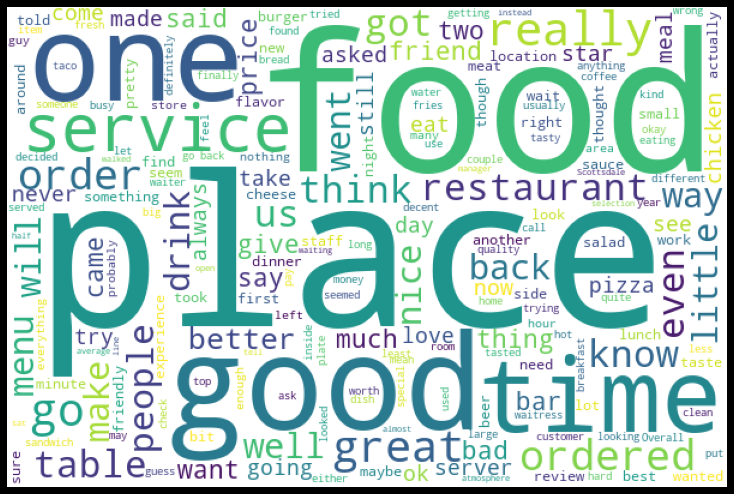

In [26]:
neg_review_cloud=WordCloud(width=600,height=400,background_color='white').generate(" ".join(negative_reviews))
plt.figure(figsize=(10,8),facecolor='k')
plt.imshow(neg_review_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

#### Some mixed words like better,good ,try could be a part of some suggestion or negative review

# Section:3 Modelling

### In this section we have crated a function ReadyText for making data ready for model building

In [27]:
stemmer = SnowballStemmer("english")

def ReadyText(message):
    
    message = message.translate(str.maketrans('', '', string.punctuation))
    words = [stemmer.stem(word) for word in message.split() if word.lower() not in stopwords.words("english")]
    
    return " ".join(words)

df["text"] = df["text"].apply(ReadyText)
df.head(n = 10)    

,stars,text,text_length
0,1,wife took birthday breakfast excel weather per...,889
1,1,idea peopl give bad review place goe show plea...,1345
2,1,love gyro plate rice good also dig candi select,76
3,1,rosi dakota love chaparr dog park conveni surr...,419
4,1,general manag scott petello good egg go detail...,469
5,1,quiessenc simpli put beauti full window earthi...,2094
6,1,drop your drive ate go back next day food good...,1565
7,1,luckili didnt travel far make connect flight t...,274
8,1,definit come happi hour price amaz sake bomber...,349
9,1,nobuo show uniqu talent everyth menu care craf...,186


### Now we have to divide our data into dependent vairable i.e X and independent vairable Y

In [28]:
y=df['stars']
x=df['text']

### In this section we have spliited our dataset into training set and test test with a ratio of 0.2.The model will be trained  on training set and will be evaluated on the unseen data i.e test set

In [29]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.2)

In [30]:
print("x_train shape :",x_train.shape)
print("x_test shape  :",x_test.shape)
print("y_train shape :",y_train.shape)
print("y_tets shape  :",y_test.shape)

x_train shape : (8000,)
x_test shape  : (2000,)
y_train shape : (8000,)
y_tets shape  : (2000,)


### As we know that nachine learning algorithms don't accept as text as input so we have to convert into vectors .For this  we have used CountVectorizer for converting the text into vectors

### Here we will build models using three classification algorithms 


#### 1:Logistic Regression

In [31]:
cv=CountVectorizer()
lr=LogisticRegression(max_iter=10000)
x_train=cv.fit_transform(x_train)
lr.fit(x_train,y_train)
pred_1=lr.predict(cv.transform(x_test))
score_1=accuracy_score(y_test,pred_1)

### Accuracy Score :Logistic Regression

In [32]:
print(score_1*100)

82.25


### Making Predictions :Logistic Regression

In [33]:
print(lr.predict(cv.transform(['Thats a very good dish,I like it'])))

[1]


#### It predicted as a positive review.So our model is working Fine

### Confusion Matrix :Logistic Regression

<Figure size 432x288 with 0 Axes>

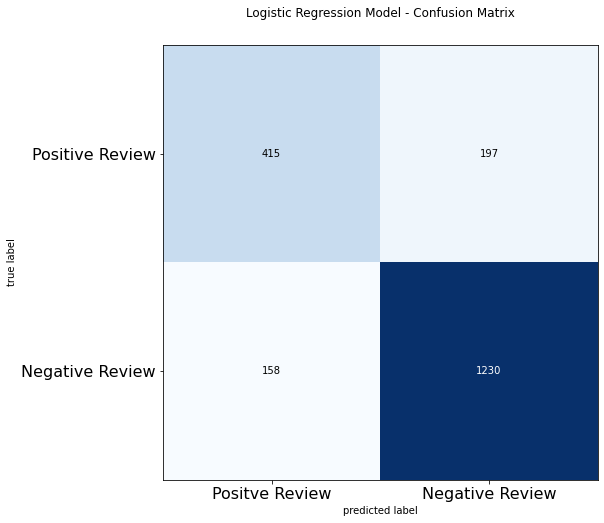

In [34]:
cm = confusion_matrix(y_test, pred_1)
plt.figure()
plot_confusion_matrix(cm, figsize=(12,8), hide_ticks=True, cmap=plt.cm.Blues)
plt.title("Logistic Regression Model - Confusion Matrix")
plt.xticks(range(2), ["Positve Review","Negative Review"], fontsize=16)
plt.yticks(range(2), ["Positive Review","Negative Review"], fontsize=16)
plt.show()

### Navie Bayes:

In [35]:
nb=MultinomialNB()
nb.fit(x_train,y_train)
pred_2=nb.predict(cv.transform(x_test))
score_2=accuracy_score(y_test,pred_2)

### Accuracy Score:Naive Bayes

In [36]:
print(score_2*100)

82.55


### Predcitons:Naive Bayes

In [37]:
print(nb.predict(cv.transform(['the dish is just ok'])))

[0]


#### So far so good.It correctly predicted the seniment i.e Neagtive

### Confusion Matrix:Naive Bayes

<Figure size 432x288 with 0 Axes>

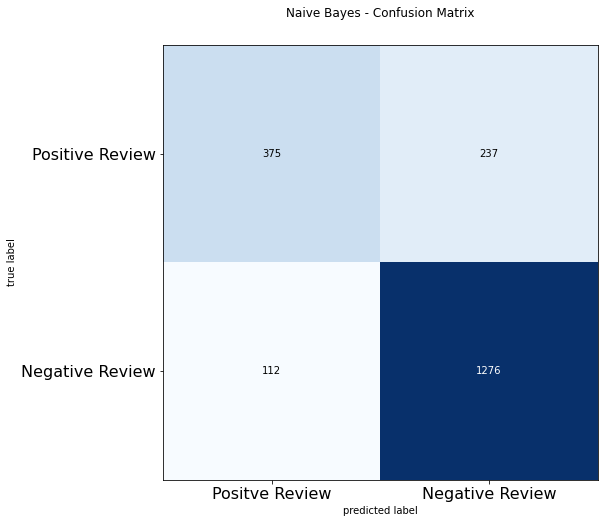

In [38]:
cm = confusion_matrix(y_test, pred_2)
plt.figure()
plot_confusion_matrix(cm, figsize=(12,8), hide_ticks=True, cmap=plt.cm.Blues)
plt.title("Naive Bayes - Confusion Matrix")
plt.xticks(range(2), ["Positve Review","Negative Review"], fontsize=16)
plt.yticks(range(2), ["Positive Review","Negative Review"], fontsize=16)
plt.show()

### Support Vetor Machines:

In [39]:
svm=SVC()
svm.fit(x_train,y_train)
pred_3=svm.predict(cv.transform(x_test))
score_3=accuracy_score(y_test,pred_3)

### Accuracy Score:Support Vector Machine

In [40]:
print(score_3*100)

81.3


### Predictions:Support Vector Machine

In [41]:
print(svm.predict(cv.transform(['I love this place'])))

[1]


### Predicted Correctly again!

### Confusin Matrix:Support Vector Machine

<Figure size 432x288 with 0 Axes>

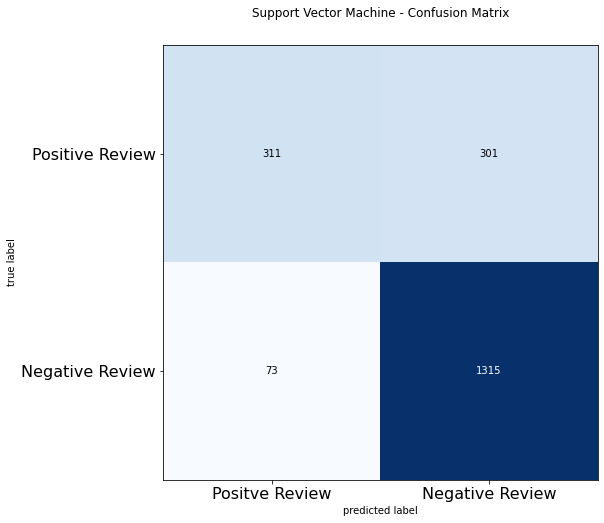

In [42]:
cm = confusion_matrix(y_test, pred_3)
plt.figure()
plot_confusion_matrix(cm, figsize=(12,8), hide_ticks=True, cmap=plt.cm.Blues)
plt.title("Support Vector Machine - Confusion Matrix")
plt.xticks(range(2), ["Positve Review","Negative Review"], fontsize=16)
plt.yticks(range(2), ["Positive Review","Negative Review"], fontsize=16)
plt.show()